<a href="https://colab.research.google.com/github/OZambranoE/predicciones-de-ventas/blob/main/predicciones_de_ventas_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

filename = '/content/drive/MyDrive/Codificación de Dojo/Semana2/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. Indicar cantidad de filas y columnas



In [2]:
print(df.shape)
#Son 8523 filas y 12 columnas

(8523, 12)


2. Indicar tipo de datos en cada variable

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3.  ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [4]:
df.duplicated().sum()
#no hay valores duplicados

0

4. Identificar los valores faltantes

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decidir cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [6]:
#lo primero sera filtrar los valores nulos para buscar algun tipo de relacon entre los datos
#Comenzare con Item_Weight

df_Nweight = df.loc[df['Item_Weight'].isna() == True]
df_Nweight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
#se encuentra una relacion entre Item_Identifier e Item_Weight. Cada objeto de Item_Identifier tiene asociado un peso especifico
df.loc[df['Item_Identifier']=="FDW12"	]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
1788,FDW12,8.315,Regular,0.059541,Baking Goods,143.6444,OUT010,1998,NaN,Tier 3,Grocery Store,145.1444
2973,FDW12,8.315,reg,0.035627,Baking Goods,146.6444,OUT049,1999,Medium,Tier 1,Supermarket Type1,870.8664
5319,FDW12,8.315,Regular,0.035543,Baking Goods,143.3444,OUT013,1987,High,Tier 3,Supermarket Type1,1596.5884
6285,FDW12,8.315,Regular,0.035572,Baking Goods,144.4444,OUT046,1997,Small,Tier 1,Supermarket Type1,2902.8880
7004,FDW12,8.315,Regular,0.035644,Baking Goods,147.1444,OUT045,2002,NaN,Tier 2,Supermarket Type1,870.8664
7259,FDW12,8.315,Regular,0.035773,Baking Goods,144.3444,OUT017,2007,NaN,Tier 2,Supermarket Type1,3483.4656


In [8]:
#se rellenan los valores sin datos segun los de la columna Item_Identifier
df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'), inplace=True)

In [9]:
#se ve que ahora quedan solo 4 valores nulos que no tenian relacion con la columna Item_Identifier.
#como son solamente 4 filas en un universo de 8523, eliminarlas no es tan grave
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.dropna(subset=['Item_Weight'], inplace = True)

In [11]:
#Ahora para la columna Outlet_Size	
#se crea un dataframe con las filas nulas para empezar a comparar y buscar alguna relacion.
filas_null = df[df.isnull().any(True)]
filas_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [12]:
#comparacion con la columna Outlet_Identifier
#No se observa relacion
df.loc[df['Outlet_Identifier'] == filas_null['Outlet_Identifier'].iloc[0]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [13]:
df.loc[df['Outlet_Type'] == filas_null['Outlet_Type'].iloc[0]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [14]:
#Se ve que los unicos valores que hay ademas de los NaN es Small, po lo que se podria pensar que los valores faltantes corresponden a ese tamaño.
df.loc[df['Outlet_Type'] == filas_null['Outlet_Type'].iloc[0]]['Outlet_Size'].unique().tolist()

[nan, 'Small']

In [15]:
#Se rellenan los valores nulos
df['Outlet_Size'].fillna('Small', inplace=True)

6. Confirmen que no hay valores faltantes después de abordarlos

In [16]:
#Se comprueba que ya no hay valores nulos en el dataframe
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [17]:
df['Item_Fat_Content'].value_counts()
#se ve que Low Fat está escrita de 3 formas distintas y que Regular está escrita de 2 formas distintas

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
#Se unifican las palabras a Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [19]:
#Lo mismo para Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [20]:
#Se comprueban los cambios
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [21]:
#Se utiliza la columna de Precio máximo de venta al público
df['Item_MRP'].describe().round(2)

count    8519.00
mean      141.01
std        62.28
min        31.29
25%        93.84
50%       143.05
75%       185.68
max       266.89
Name: Item_MRP, dtype: float64

#Semana 3

In [22]:
#el primer grafico será un histograma que relacione el monto de ventas en relacion al tipo de outlet
#para esto, lo primero es hacer un groupby entre ambas columnas
df_histo = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
df_histo

Outlet_Type
Grocery Store        3.679138e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.444468e+06
Name: Item_Outlet_Sales, dtype: float64

Text(0, 0.5, 'Ventas')

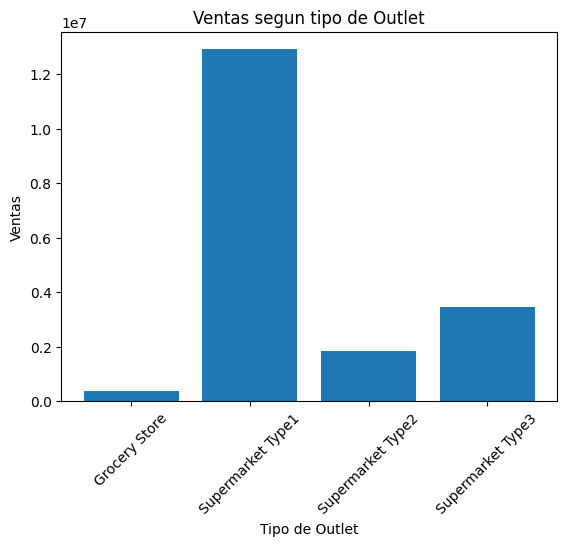

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(df_histo.index, df_histo.values);
plt.xticks(rotation = 45)
plt.title('Ventas segun tipo de Outlet')
plt.xlabel('Tipo de Outlet')
plt.ylabel('Ventas')
#Se observa las notables diferencias en ventas entre las tiendas, destacando sobre las demas el "Supermarket Type 1" que concentra alrededor del 50% de las ventas totales.
#En contraparte, las menores ventas las presenta "Grocery Store"

<Axes: ylabel='Item_MRP'>

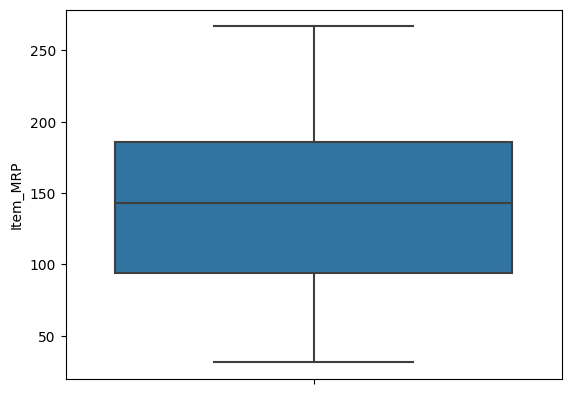

In [24]:
#Se realiza un boxplot con "Item_MRP" para visualizar de mejor manera los precios maximos, minimo y la media de los productos del estudio.
sns.boxplot(y='Item_MRP', data=df)

<Axes: >

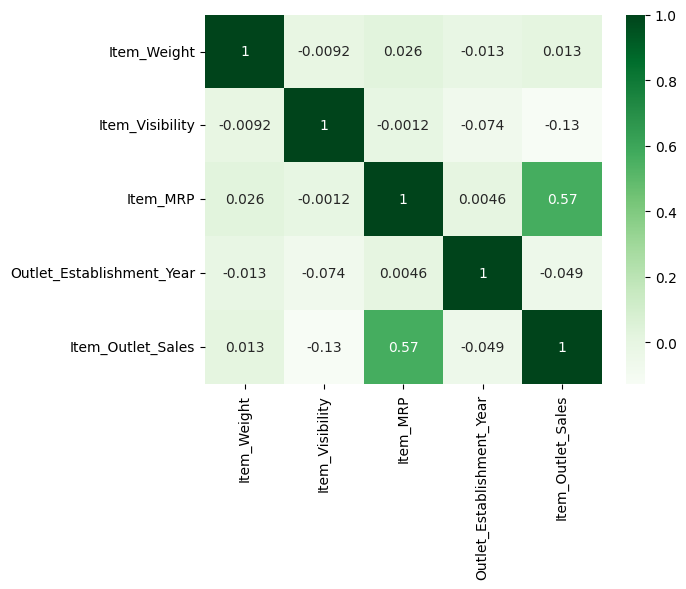

In [25]:
#Mapa de calor para observar correlaciones
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
#No se observan mayores correlaciones positivas ni negativas entre las distintas columnas.
#La unica correlacion moderada que se observa es entre Item_MRP e Item_Outlet_Sales, ambas columnas tienen que ver con los valores en dinero de los productos,
#por lo que es esperable que si sube el valor de los items, tambien suba el valor de la suma de ventas.

In [28]:
df_fat = df.groupby(['Item_Fat_Content'])['Item_MRP'].mean()
df_fat
#La idea es ver si existe alguna diferencia considerable en el precio medio de los productos bajos en grasa, con los de grasa regular, para ver la predispocicion en la compra de uno u otro

Item_Fat_Content
Low Fat    140.717845
Regular    141.546694
Name: Item_MRP, dtype: float64

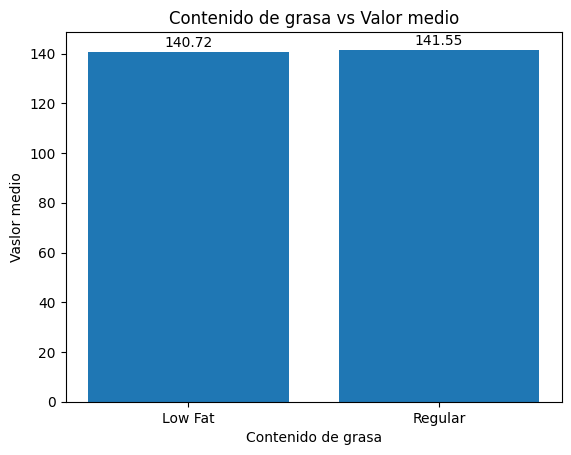

In [42]:
plt.bar(df_fat.index, df_fat.values);
plt.title('Contenido de grasa vs Valor medio')
plt.xlabel('Contenido de grasa')
plt.ylabel('Vaslor medio')
for i, v in enumerate(df_fat.values.round(2)):
  plt.text(i, v + 2, str(v), ha='center')
  #Como se observa en la gráfica, el valor medio de los productos con contenido de grasa medio y alto no serian un buen indicador de compra al ser bastante similares.

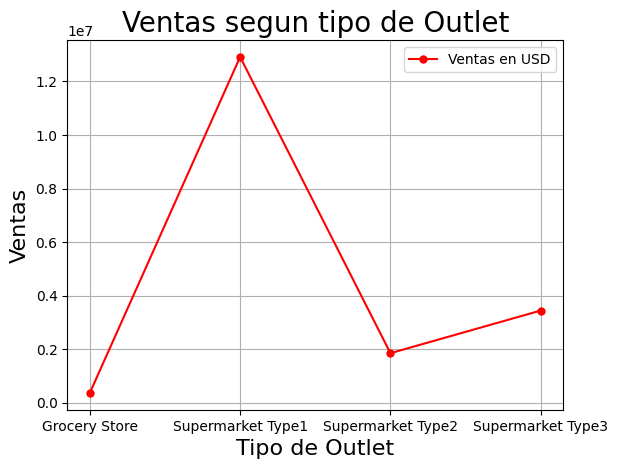

In [54]:
plt.plot(df_histo, c = (1, 0, 0), marker = '.', markersize = 10, label = 'Ventas en USD')
plt.xlabel('Tipo de Outlet', fontsize = 16)
plt.ylabel('Ventas', fontsize = 16)
plt.title('Ventas segun tipo de Outlet', fontsize = 20)
plt.grid()
plt.legend()
#se modifica el grafico de la semana apsada para ver de mejor manera los resultados y se le agrega una mejor configuracion para que se observen de mejor manera los datos.